# table3.20.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.tsa.api as smt
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test

## statsmodels自帶的畫ACF的函數

In [2]:
def drawts(y,pname):
    ##draw ax
    fig = plt.figure(figsize=(10,8))
    ts_ax=plt.subplot2grid((2,2),(0,0),colspan=2)
    acf_ax=plt.subplot2grid((2,2),(1,0))
    pacf_ax=plt.subplot2grid((2,2),(1,1))
    ##draw plot
    ts_ax.plot(y,'*-')
    ts_ax.set_title('Time Series Analysis Plots')
    smt.graphics.plot_acf(y,lags=None,ax=acf_ax,alpha=0.05) ##2sigma
    smt.graphics.plot_pacf(y,lags=None,ax=pacf_ax,alpha=0.05)  ##2sigma
    #plt.savefig('%s.jpg'%pname,dpi=256)
    plt.show()
    plt.close()

## statsmodels自帶的LB test

In [3]:
def purerandtest(y):
    a,b=lb_test(y,lags=None,boxpierce=False)
    LB_purerand=pd.DataFrame(np.c_[a,b],columns=['LB','Pvalue'])
    LB_purerand['lags']=range(1,len(a)+1)
    print('----time series: LB pure randomness test----')
    print(LB_purerand)

## 開始分析

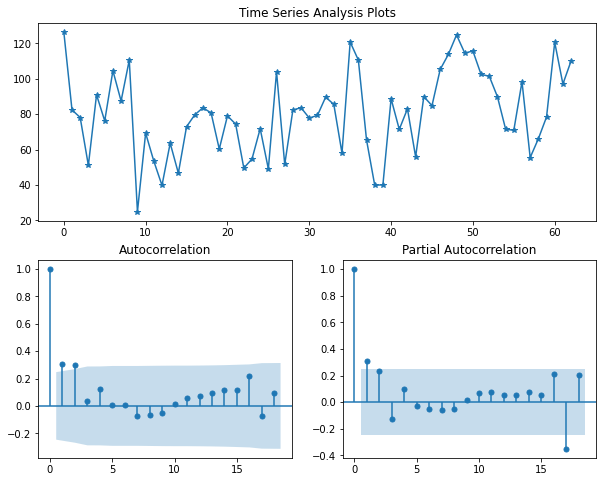

----time series: LB pure randomness test----
           LB    Pvalue  lags
0    6.190616  0.012843     1
1   12.063976  0.002401     2
2   12.159159  0.006857     3
3   13.273210  0.010015     4
4   13.278909  0.020901     5
5   13.283953  0.038742     6
6   13.647810  0.057812     7
7   13.971151  0.082520     8
8   14.158314  0.116804     9
9   14.175125  0.165152    10
10  14.429248  0.210144    11
11  14.892817  0.247350    12
12  15.567812  0.273257    13
13  16.659078  0.274801    14
14  17.854162  0.270410    15
15  21.881504  0.147059    16
16  22.383869  0.170403    17
17  23.255736  0.180953    18
18  23.483608  0.216712    19
19  24.594496  0.217387    20
20  26.423473  0.190760    21
21  29.692925  0.126121    22
22  35.815099  0.043081    23
23  36.230214  0.052127    24
24  36.348139  0.066481    25
25  36.925766  0.075912    26
26  36.973122  0.095570    27
27  36.973490  0.119446    28
28  37.241451  0.140149    29


/Users/shaohuasong/miniforge3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
/Users/shaohuasong/miniforge3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [4]:
dfname='table3.20'
y=pd.read_csv('%s.csv'%dfname,header=None)
y.iloc[:,0]=y.iloc[:,0].astype('float')
y=y.values[:,0]
drawts(y,dfname)
purerandtest(y)

## 參數估計

In [5]:
arma02=smt.ARMA(y,(0,2)).fit()
print('\n----fitting summary----')
print(arma02.summary())
print('sigma 2 of residual: %f'%arma02.sigma2)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.49480D+00    |proj g|=  8.07603D-03

At iterate    5    f=  4.49463D+00    |proj g|=  5.45519D-04

At iterate   10    f=  4.49460D+00    |proj g|=  1.35003D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     27      1     0     0   1.776D-07   4.495D+00
  F =   4.4946044281878264     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

----fitting summary----
                              ARMA Model Resu

/Users/shaohuasong/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


## 模型顯著性檢驗

In [6]:
resid=arma02.resid
print('\n----residual pure randomness test')
purerandtest(resid)


----residual pure randomness test
----time series: LB pure randomness test----
           LB    Pvalue  lags
0    0.038481  0.844481     1
1    0.075264  0.963067     2
2    0.079340  0.994196     3
3    1.310732  0.859552     4
4    1.371559  0.927399     5
5    1.372892  0.967487     6
6    1.521804  0.981545     7
7    1.626807  0.990397     8
8    1.766884  0.994641     9
9    1.780051  0.997765    10
10   1.916773  0.998768    11
11   2.082033  0.999269    12
12   2.293633  0.999514    13
13   2.303557  0.999804    14
14   2.868673  0.999696    15
15   7.618137  0.959430    16
16  10.292760  0.890887    17
17  10.859300  0.900232    18
18  11.227942  0.915933    19
19  13.915997  0.834729    20
20  14.531378  0.845711    21
21  16.629731  0.783452    22
22  20.719200  0.598231    23
23  21.054884  0.635485    24
24  21.097819  0.687143    25
25  22.219321  0.676639    26
26  22.227566  0.725725    27
27  22.248762  0.769646    28
28  22.638493  0.792821    29


/Users/shaohuasong/miniforge3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
/Users/shaohuasong/miniforge3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


## 模型優化ARMA(1,0)

In [8]:
arma20=smt.ARMA(y,(2,0)).fit()
print('\n----fitting summary----')
print(arma20.summary())
print('sigma 2 of residual: %f'%arma20.sigma2)

resid=arma20.resid
print('\n----residual pure randomness test')
purerandtest(resid)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.49774D+00    |proj g|=  4.03784D-03

At iterate    5    f=  4.49699D+00    |proj g|=  6.03038D-03

At iterate   10    f=  4.49675D+00    |proj g|=  2.66454D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     18      1     0     0   8.882D-08   4.497D+00
  F =   4.4967491047798385     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

----fitting summary----
                              ARMA Model Resu

/Users/shaohuasong/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.
/Users/shaohuasong/miniforge3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:531: FutureWarning: The d